In [48]:
!pip install matplotlib

In [49]:
import torch
from torch import nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


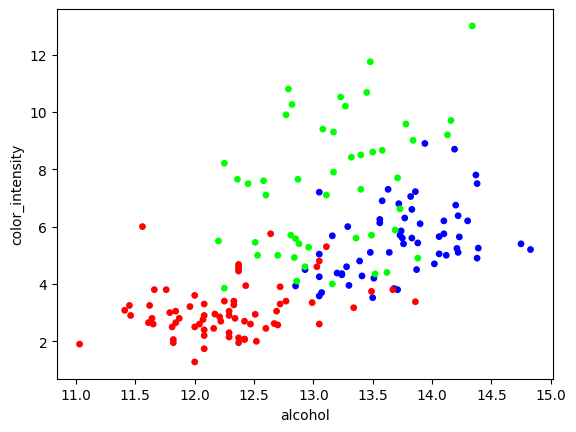

In [50]:
features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
target = wine.target

plt.scatter(data[:, 0], data[:, 1], c=target, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])
plt.show()


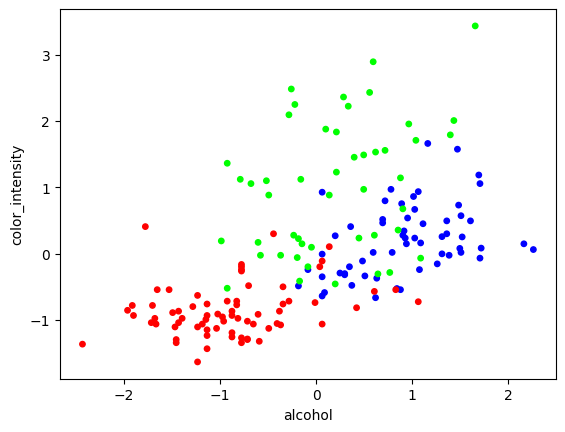

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=target, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])
plt.show()


In [52]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

input_size = data.shape[1]
hidden_size = 32
output_size = len(wine.target_names)

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
)

net.to(device)

cuda


Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=3, bias=True)
)

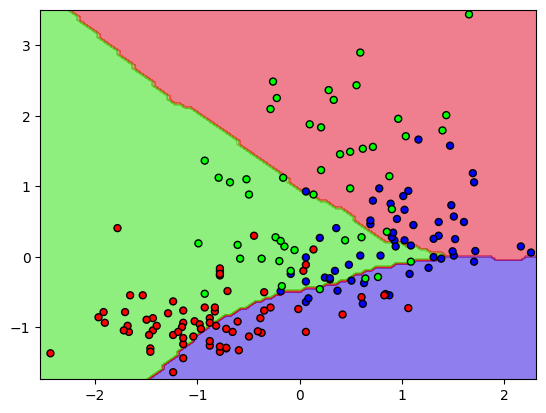

In [54]:
def plot_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    spacing = min(x_max - x_min, y_max - y_min) / 100

    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))

    data = np.hstack((XX.ravel().reshape(-1, 1),
                      YY.ravel().reshape(-1, 1)))

    # For multi-class problems
    db_prob = model(torch.Tensor(data).to(device))
    clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

    Z = clf.reshape(XX.shape)

    plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

plot_boundary(data, target, net)
plt.show()



In [56]:
from torch import optim

# Função de perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do gradiente
# Gradient Descent (Stochastic Gradient Descent)
optimizer = optim.SGD(net.parameters(), lr=1e-3)


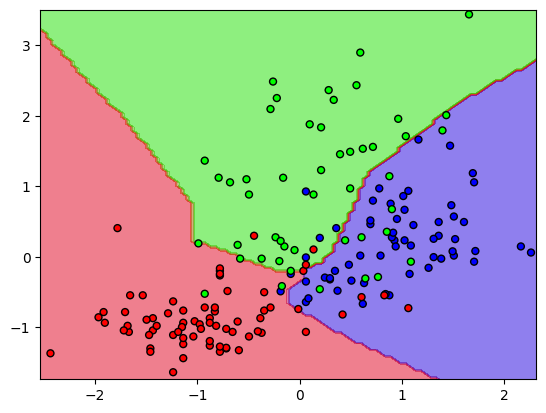

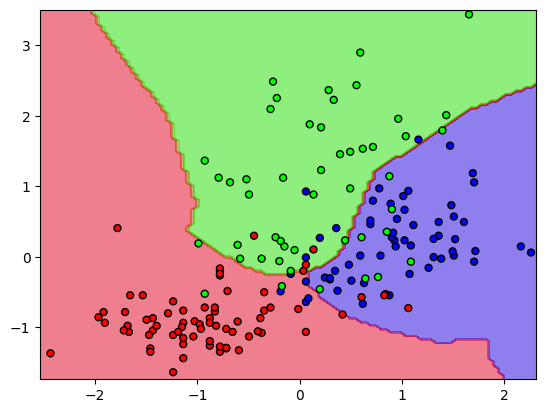

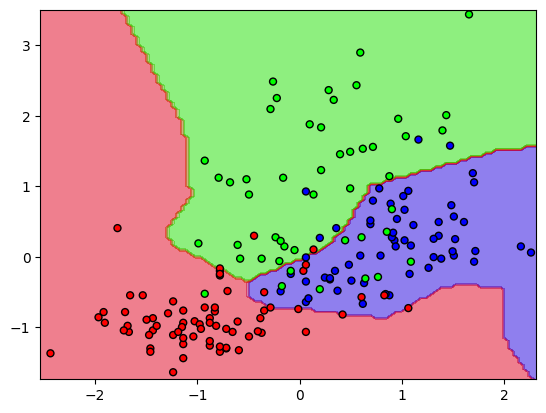

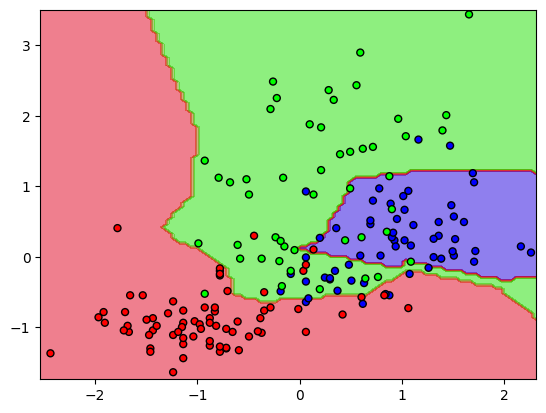

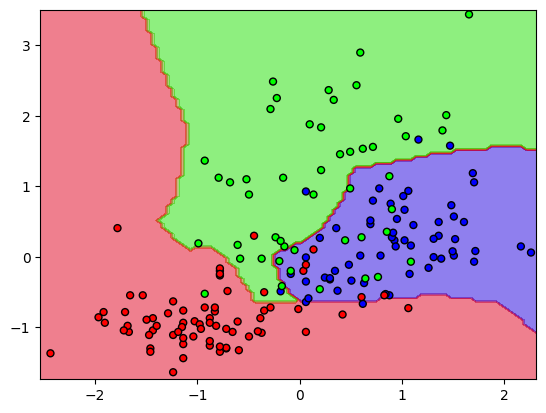

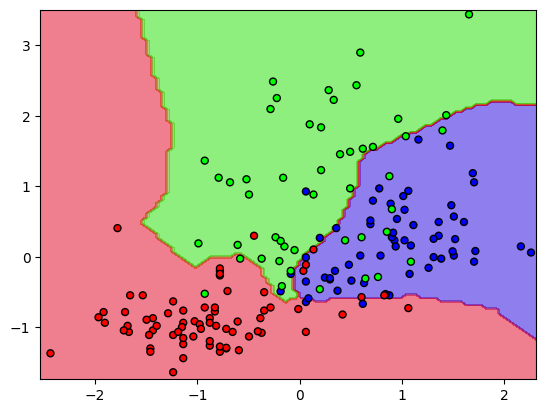

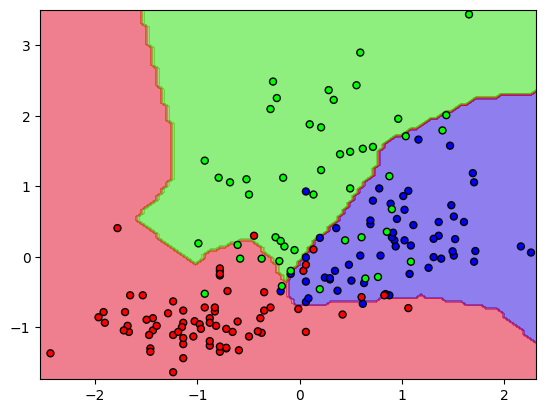

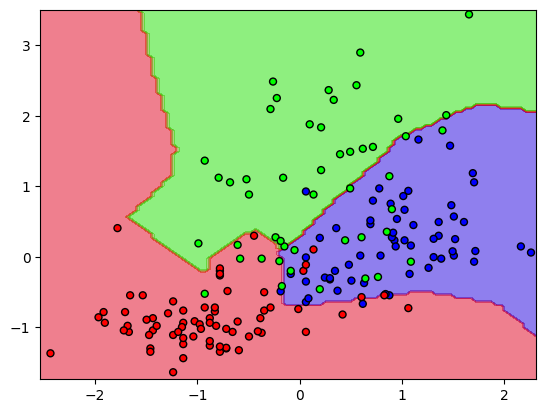

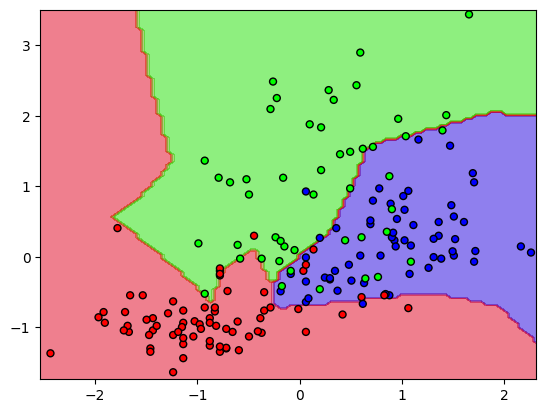

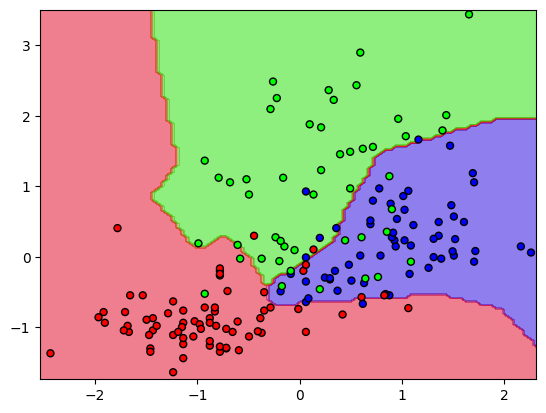

In [61]:
X = torch.FloatTensor(data).to(device)
Y = torch.LongTensor(target).to(device)

for epoch in range(1000):
    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backward
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        plot_boundary(data, target, net)
        plt.show()
